## Jupyter

In [1]:
for i in range(3):
    print(i)

0
1
2


In [5]:
print(sum(range(5)))

10


In [6]:
sum(range(5))
sum(range(10))

45

In [121]:
%pwd #use % to type bash commands

'/home/andrea/GitHub/pythonAaltoUniversity'

In [10]:
%%bash
for x in $(seq 3); do
    echo $x
done

1
2
3


In [14]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

#### Exercise 1
Fibonacci sequence

In [92]:
num = []
num.insert(0, 1)
num.insert(1, 2)
num.insert(2, 3)
print(num)

[1, 2, 3]


In [101]:
fib = [0,1]
for i in range(2,10):
    elem = fib[i-1]+fib[i-2]
    fib.insert(i, elem)

print(fib)



[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


## Advanced NumPy
Python is slow, but NumPy is quite fast, as it's implemented in C.

#### Exercise 1

In [104]:
import numpy as np

In [120]:
%%timeit
numsum = np.random.rand(1,100000000)
np.sum(numsum)


891 ms ± 75.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Solution:

In [125]:
%%timeit
print(np.random.rand(100_000_000).sum())

50001608.539042704
49999726.93417921
49998596.29223208
49997847.039307326
49996795.48757087
49997989.04544223
50000957.08474949
49998084.18655491
948 ms ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Numpy is faster than the code the instructor wrote in C, because it's optimized. Dedicated functions are outsourced to dedicated libraries, so they're faster than when you write the code yourself. E.g., calculating the norm of a vector.

In [240]:
%%timeit
rng = np.random.default_rng(seed=0)
a = np.random.rand(100_000_000)

585 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
l = np.sqrt(np.sum(a**2))

### Another example

In [129]:
a = np.random.rand(10_000, 20_000)
print(f'Matrix `a` takes up {a.nbytes / 10**6} MB')

Matrix `a` takes up 1600.0 MB


In [130]:
%%timeit
b = a.transpose()

178 ns ± 13.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Exercise 2: ravel function

In [171]:
def ravel(row, col, n_rows, n_cols): #remember that rows and cols start at 0
    return row * n_cols + col
    
ravel(3,2,2,2)

8

## Pandas

In [172]:
import pandas as pd

In [173]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col='Name')

In [174]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
titanic.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

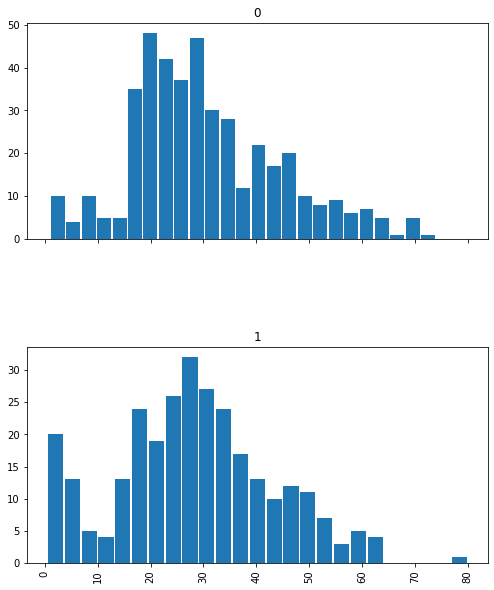

In [177]:
titanic.hist(column="Age", by="Survived", bins=25, figsize=(8,10), layout=(2,1), zorder=2, sharex=True, rwidth=0.9)

In [180]:
titanic.groupby?

Signature:
titanic.groupby(
    by=None,
    axis=0,
    level=None,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    squeeze: bool = <object object at 0x7fee64c46f70>,
    observed: bool = False,
    dropna: bool = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the gro

### What's in a dataframe?

Each column of a dataframe is a pandas.Series object. Series have to be in a uniform type.

In [182]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [185]:
titanic.index

Index(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       ...
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"', 'Behr, Mr. Karl Howell',
       'Dooley, Mr. Patrick'],
      dtype='object', name='Name', length=891)

If we didn't select Name as the index column, we would just see numbers here.

In [186]:
titanic.Age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [187]:
titanic["Age"]

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [189]:
titanic.iloc[0:2,3:6]

,Sex,Age,SibSp
Name,,,
"Braund, Mr. Owen Harris",male,22.0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1


In [194]:
titanic.loc["Lam, Mr. Ali", "Survived"]

1

In [198]:
titanic.at["Lam, Mr. Ali","Survived"]

1

In [199]:
titanic.iat[0,5]

1

In [203]:
titanic[titanic["Age"] > 70]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Goldschmidt, Mr. George B",97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
"Connors, Mr. Patrick",117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q
"Artagaveytia, Mr. Ramon",494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C
"Barkworth, Mr. Algernon Henry Wilson",631,1,1,male,80.0,0,0,27042,30.0000,A23,S
"Svensson, Mr. Johan",852,0,3,male,74.0,0,0,347060,7.7750,NaN,S


#### Exercise 1

In [241]:
titanic.iloc[:9]["Age"].mean()

29.875